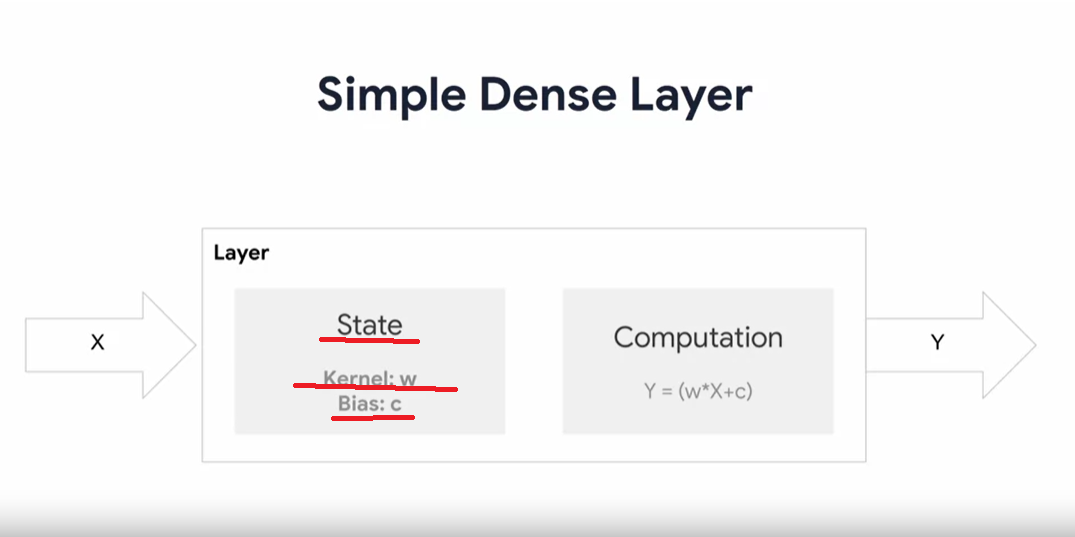

The first thing that it needs to do is pass any initialization back to the base class. Remember that this is inheriting from the layer class, so some initialization needs to be performed there too, and that's done using the super keyword. Then a local class variable called units will be set up to the parameter value of units that was passed in, will default to 32 units in this case, so if nothing is specified, this layer will have 32 units init. 
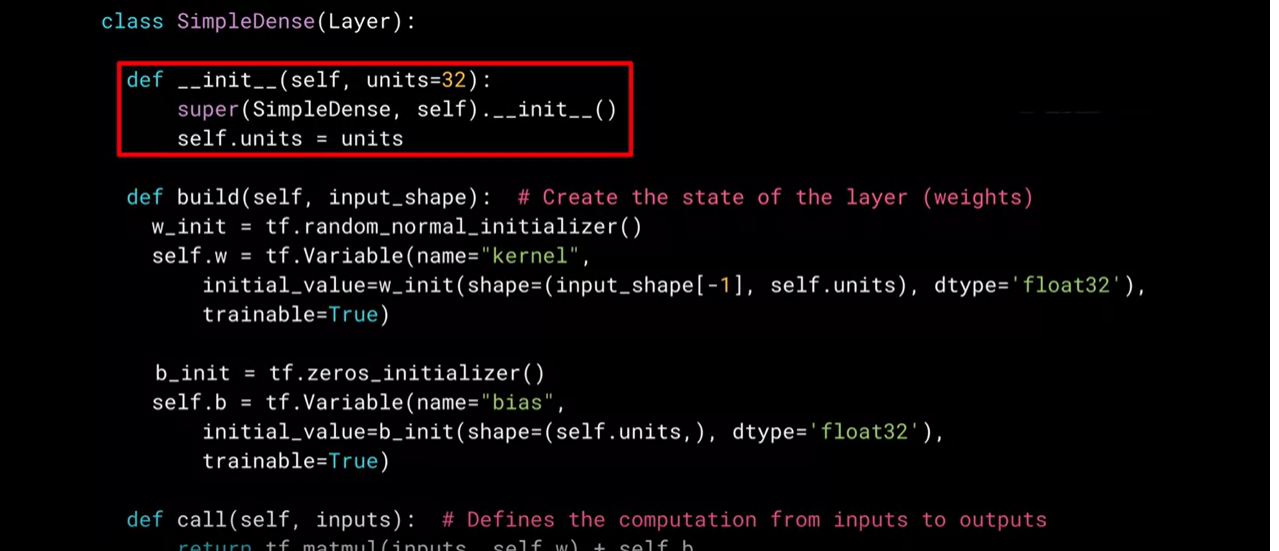

One of these is the random normal initializer, which as its name suggests, initializes them randomly using a normal distribution.
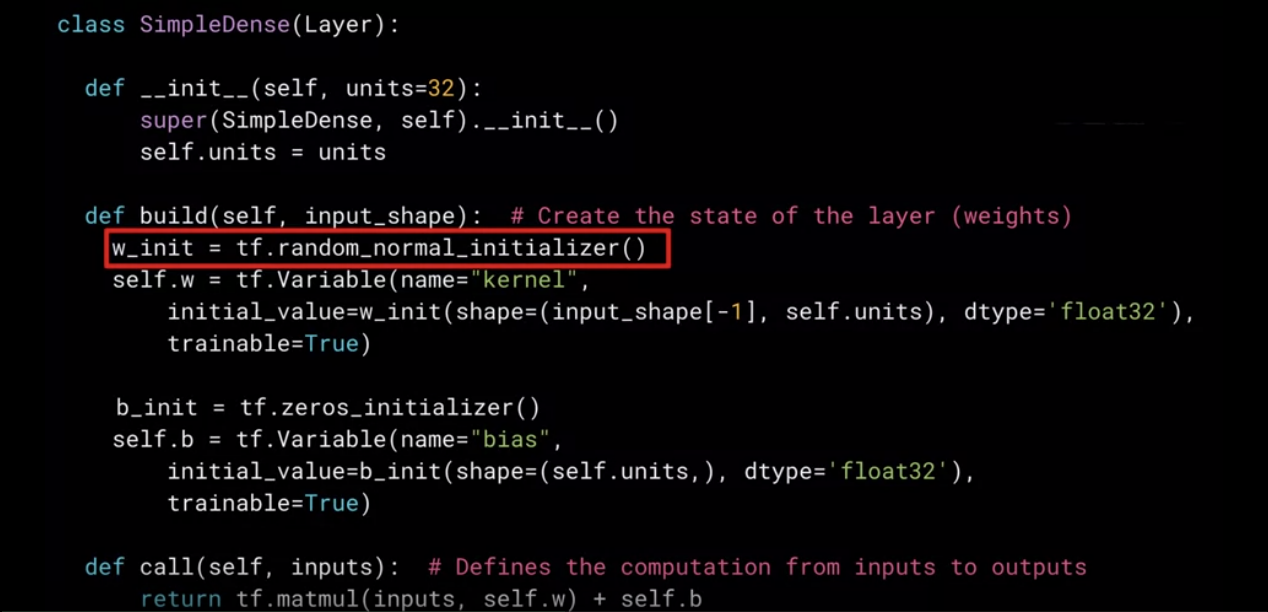

Self.w will hold the states of the ws and they'll be in a tensor by creating them as a tf.Variable. This will be initialized using the w_init for its values, it's given the name kernels so that we can trace it later. Note that it's set up to be trainable, so when you're doing a model.fit, the value of w can be modified by TensorFlow. 
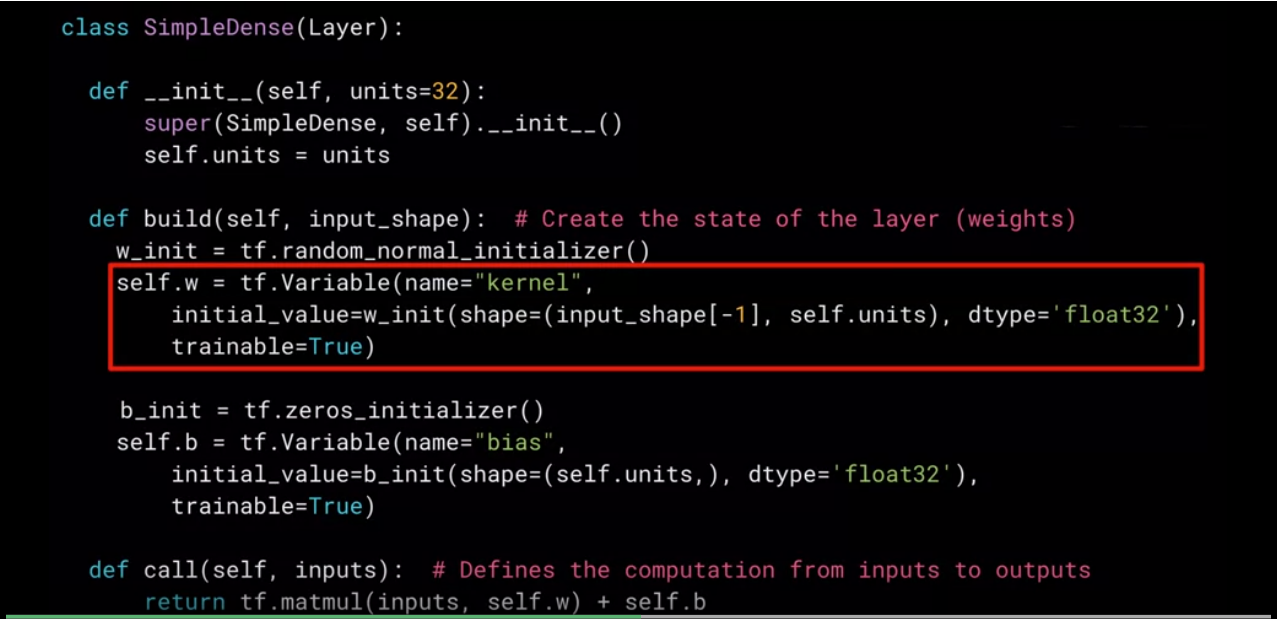

The bias is initialized differently using a tf.zeros_initializer function, which as the name suggests, will set it to zero. Self.b will then be a tensor of the number of units in the layer, and they'll all be initialized as zeros. As you can see, that'll also be trainable. 
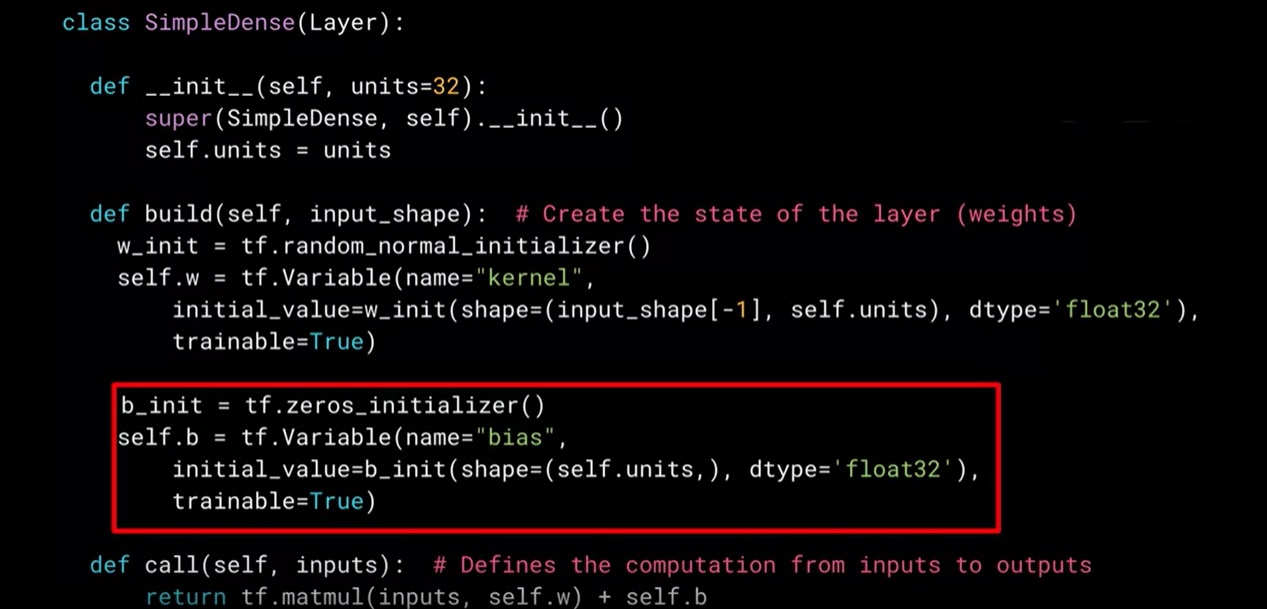

After creating w and b, it will return wX + b (In mathematics, Y = aX + b from) Here, the values of w and b are the initial value in the 1st epoch.
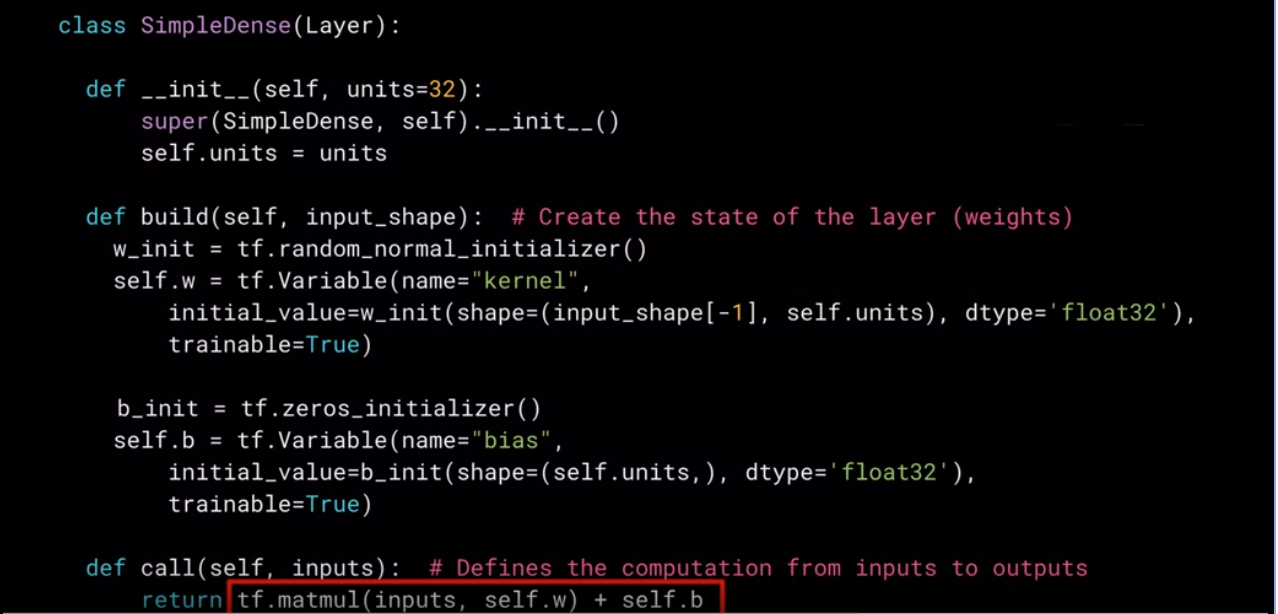

I'll create a dense layer called SimpleDense and I'll initialize it with just one neuron. I'm going to initialize an x as a tensor with tf.ones((1, 1)), which returns a tensor of the shapes specified filled in with ones, so this will give me a one-by-one tensor, which contains the value one.
I'm going to say y equals my_dense(x), so that a dense layer will be initialized. It has a single unit, so it will get the value of x. After this, we can look at the variables inside my dense, and we can see how they've been initialized by looking at the tensors.
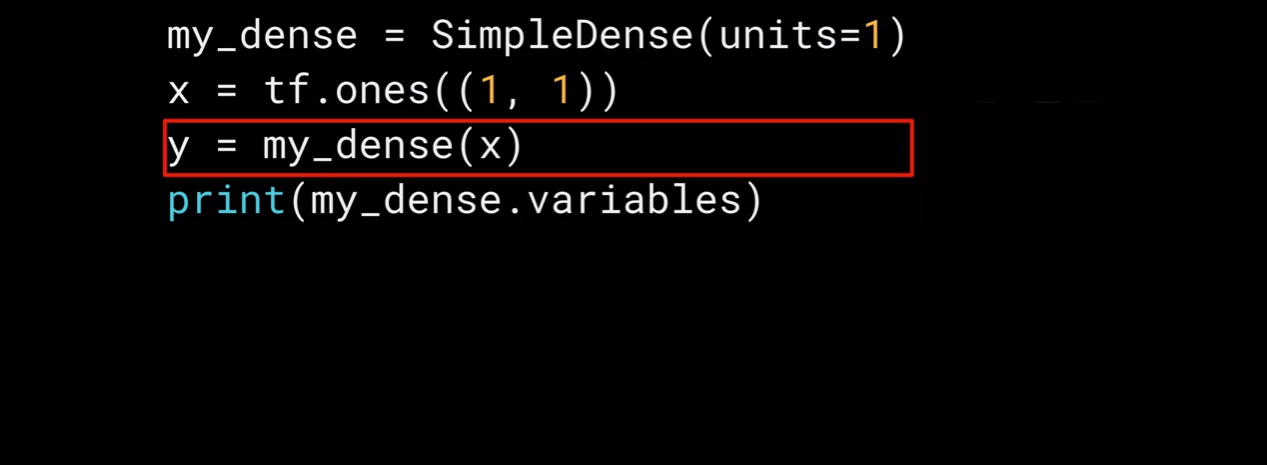

This is when you printed my_dense.varialbles. The kernel or w received a random normal distribution and ended up with 0.036. 
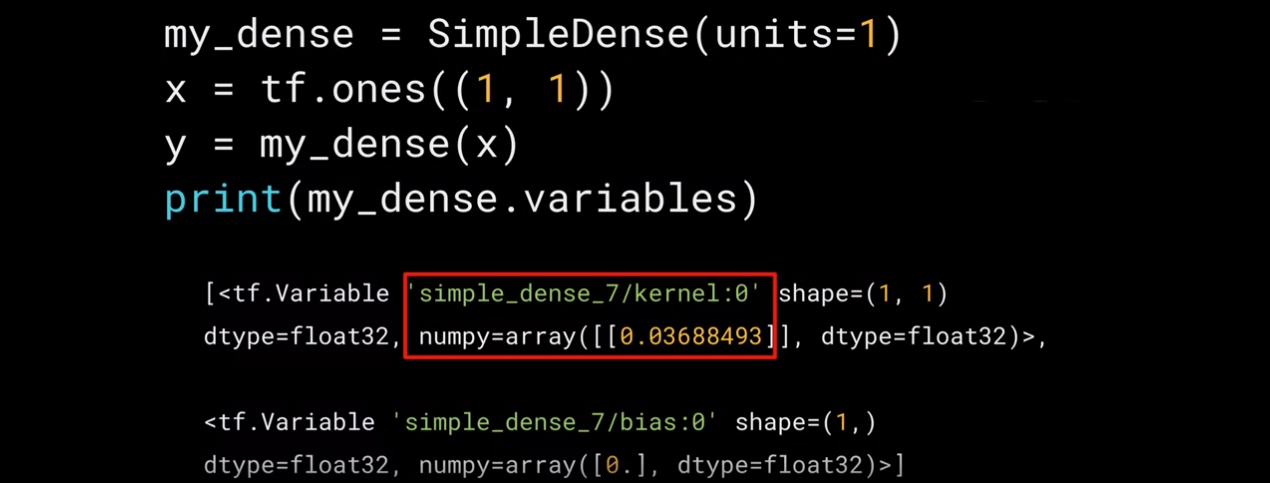

The bias, as we saw before, is initialized with zeros, so it contains zero. Now remember this is just the initial state of the layer, it only has one neuron in it, and that neuron is initialized with the value for the kernel and another for the bias. When we get to training the neural network, these values are going to change.
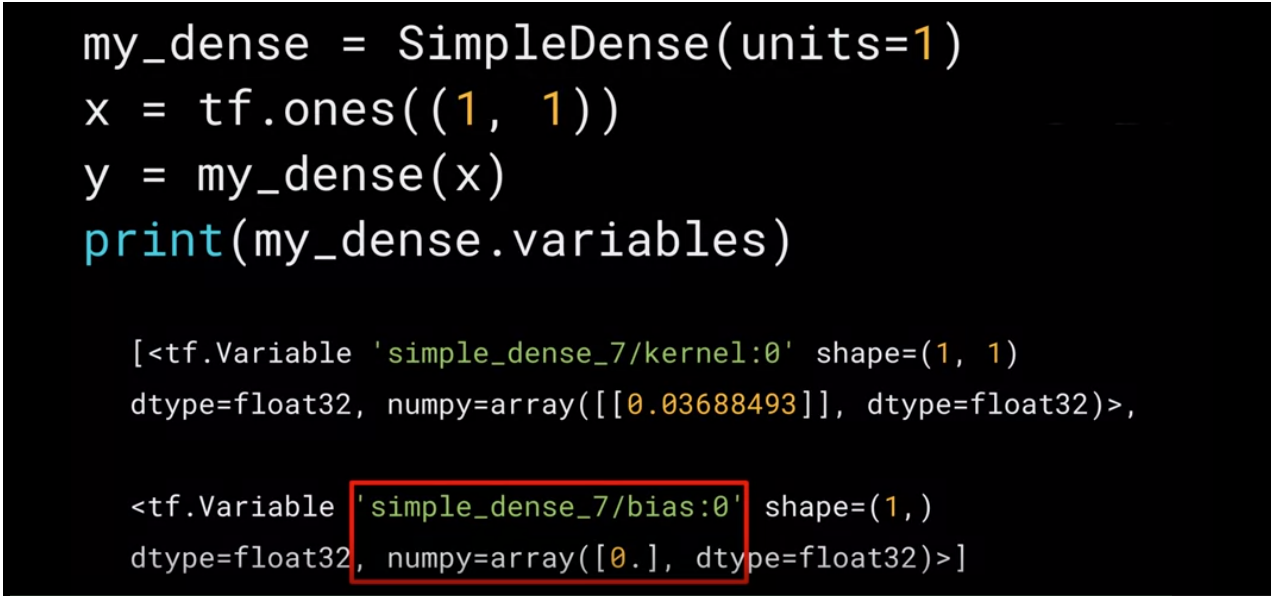

The data that I've used here has a y equals 2x minus 1 relationship and the first guess is the random initialization of the neural network that we just saw. In other words, the first guess is Y equals 0.036x plus zero, and that's not even close. (0.036 and zero are the initial calcualtion (first epoch). This code has 500 epoch. The results after the 500 epoch is in the next slide.
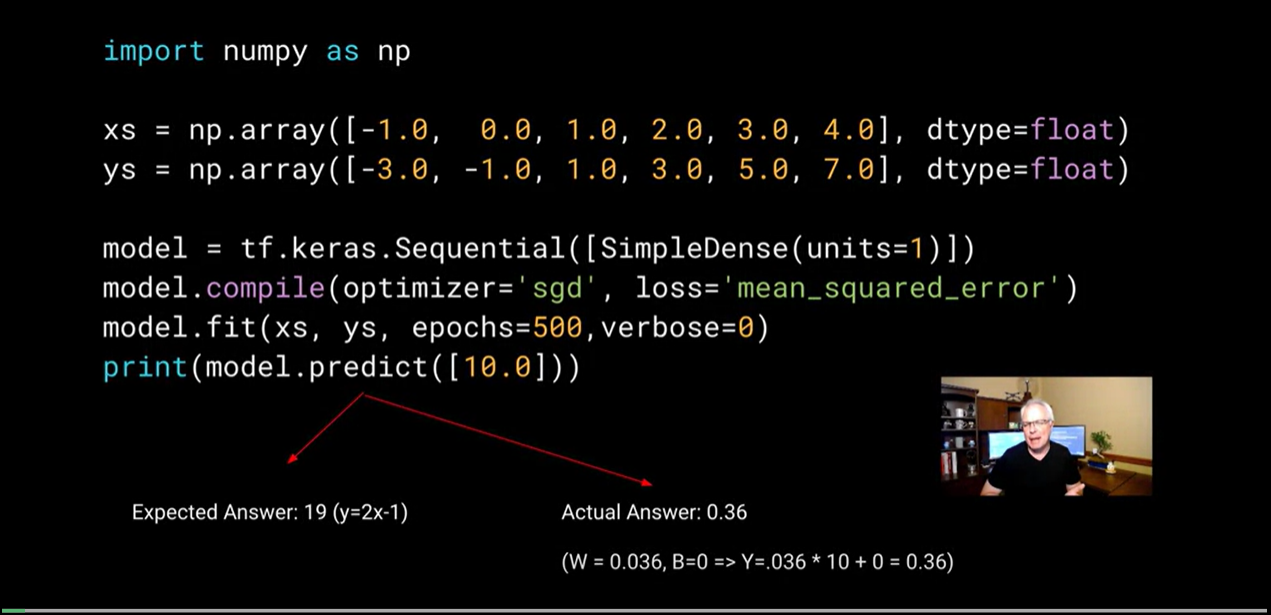

In the past, you would have used the Keras dense layer here, but now we can replace that with our simple dense one. After training, you can try to predict the value, for 10 the answer is very close to 19, as you can see here. The parameters within the layer have gotten a pretty close estimate to two for the kernel, and minus one for the bias.
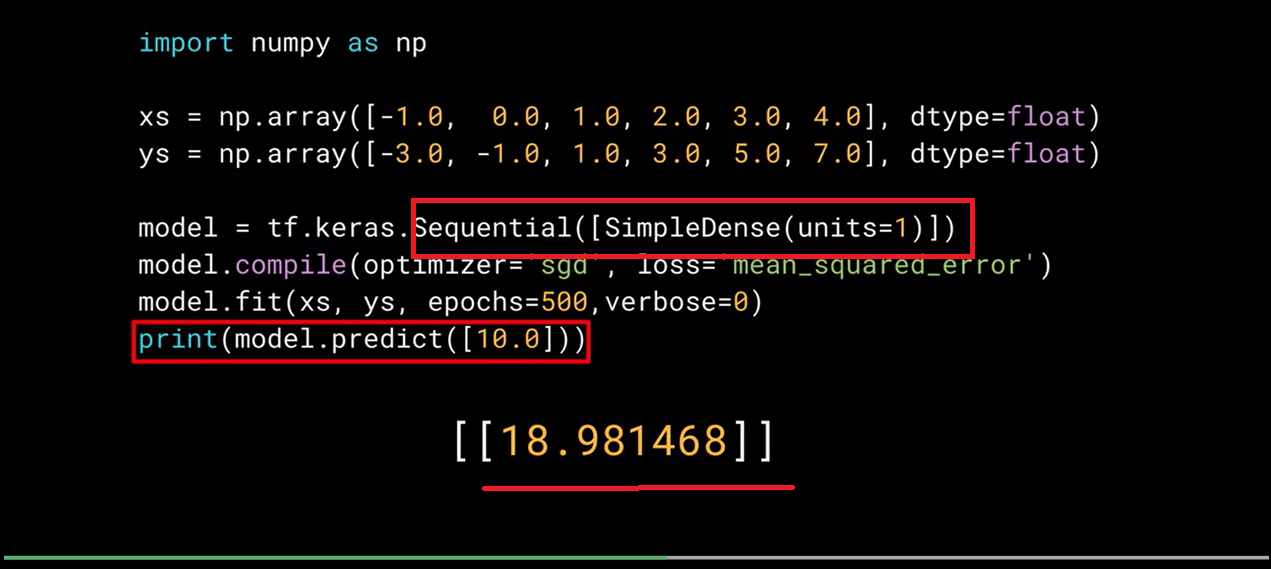

Indeed, after training, you can inspect the variables and you'll see something like this, where the relationship was y equals 2x minus one, the learned parameters where 1.9972587, which is pretty close to two, and minus 0.991591, which is pretty close to minus one.
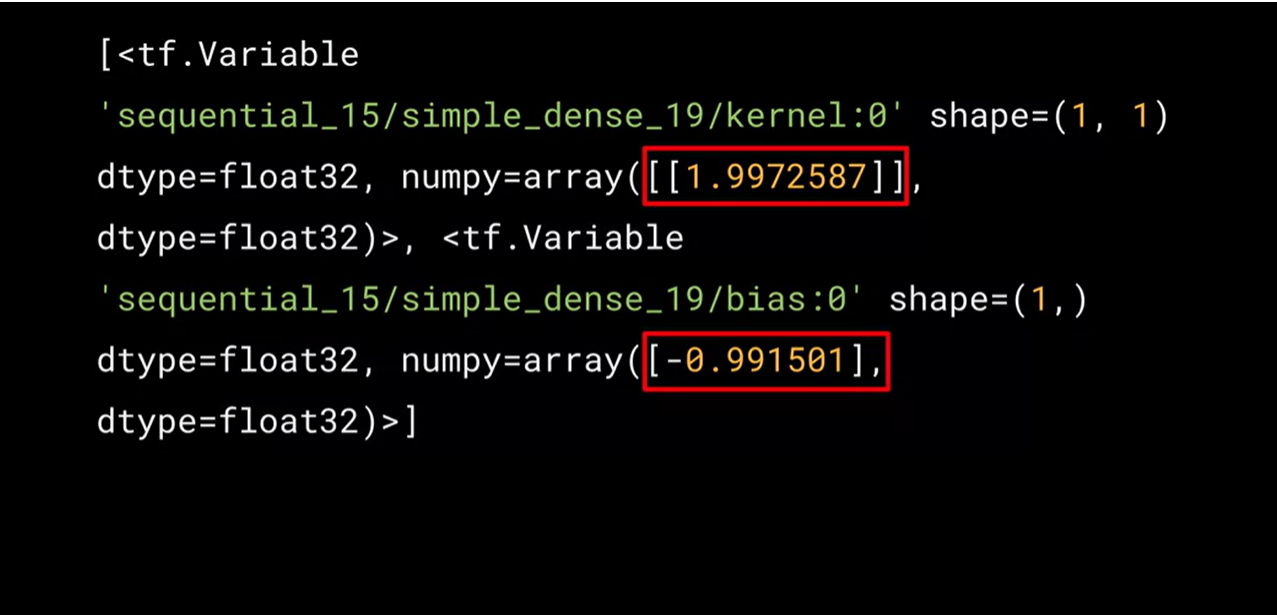

If you want to try a more complex model, you can use the simple layer there too. For example, here's the model architecture that works nicely with MNIST orfashion_MNIST data. But one thing to pay attention to before you replace the dense type from Keras with your simple layer, is the ability to specify an activation function on the layer. The simple layer that we created (SimpleDense) cannot do that yet, and you'll see how to do that later.
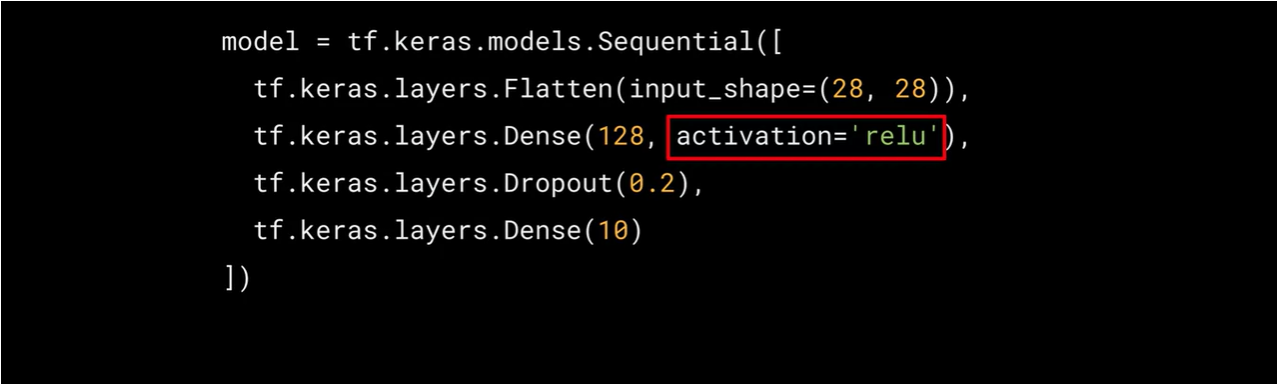

If you wanted to use simple dense, you could declare it like this. This model without the ReLu, won't perform as well as the previous architecture because of the positive impact using ReLu has as an activation function. But you could use a lambda function with the ReLu you implemented earlier and then your model will perform quite well. 
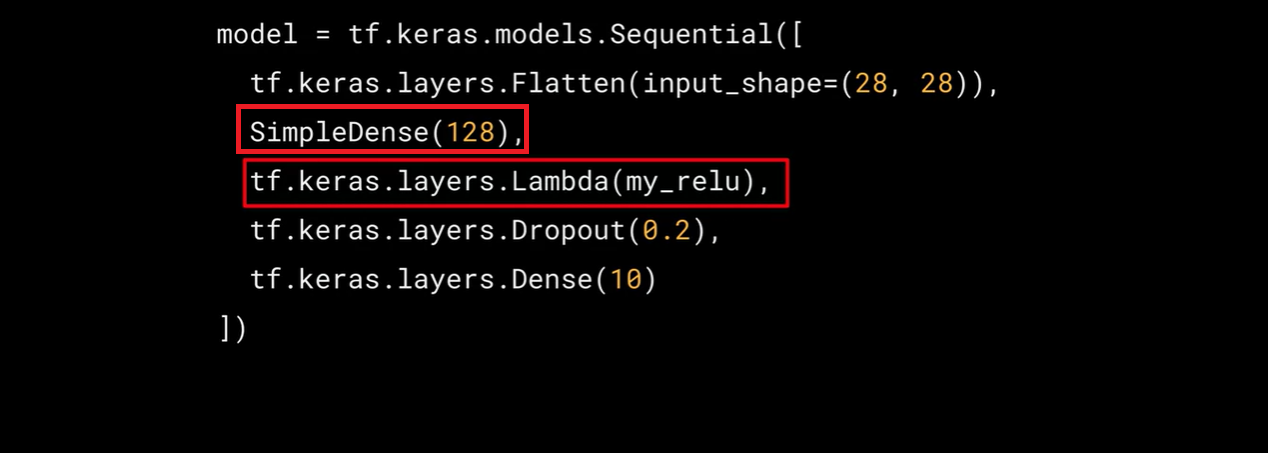

# Ungraded Lab: Building a Custom Dense Layer

In this lab, we'll walk through how to create a custom layer that inherits the [Layer](https://keras.io/api/layers/base_layer/#layer-class) class. Unlike simple Lambda layers you did previously, the custom layer here will contain weights that can be updated during training.

## Imports

In [1]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
import numpy as np

## Custom Layer with weights

To make custom layer that is trainable, we need to define a class that inherits the [Layer](https://keras.io/api/layers/base_layer/#layer-class) base class from Keras. The Python syntax is shown below in the class declaration. This class requires three functions: `__init__()`, `build()` and `call()`. These ensure that our custom layer has a *state* and *computation* that can be accessed during training or inference.

In [2]:
# inherit from this base class
from tensorflow.keras.layers import Layer

class SimpleDense(Layer):

    def __init__(self, units=32):
        '''Initializes the instance attributes'''
        super(SimpleDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        '''Create the state of the layer (weights)'''
        # initialize the weights
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(name="kernel",
            initial_value=w_init(shape=(input_shape[-1], self.units),
                                 dtype='float32'),
            trainable=True)

        # initialize the biases
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(name="bias",
            initial_value=b_init(shape=(self.units,), dtype='float32'),
            trainable=True)

    def call(self, inputs):
        '''Defines the computation from inputs to outputs'''
        return tf.matmul(inputs, self.w) + self.b

Now we can use our custom layer like below:

You can see that the initialization of the w(kernel) is showing in the output as numpy=array([[0.04172982]], bias b as numpy=array([0.]

In [3]:
# declare an instance of the class
my_dense = SimpleDense(units=1)

# define an input and feed into the layer
x = tf.ones((1, 1))
y = my_dense(x)

# parameters of the base Layer class like `variables` can be used
print(my_dense.variables)

[<tf.Variable 'simple_dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.04172982]], dtype=float32)>, <tf.Variable 'simple_dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


Let's then try using it in simple network:

In [4]:
# define the dataset
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)


# use the Sequential API to build a model with our custom layer
my_layer = SimpleDense(units=1)
model = tf.keras.Sequential([my_layer])

# configure and train the model
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(xs, ys, epochs=500,verbose=0)

# perform inference
print(model.predict([10.0]))

# see the updated state of the variables
print(my_layer.variables)

[[18.981182]]
[<tf.Variable 'sequential/simple_dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.9972725]], dtype=float32)>, <tf.Variable 'sequential/simple_dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-0.99154353], dtype=float32)>]
